## Assignment #5 - Amanda Pignataro

Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [2]:
library(tidymodels)

The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [3]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [4]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 10, 4, 10, 8, 1, 13, 5, 5, 3, 6, 10, 4,…
$ Glucose                  <dbl> 85, 89, 115, 110, 139, 99, 97, 145, 117, 109,…
$ BloodPressure            <dbl> 66, 66, 0, 92, 80, 84, 66, 82, 92, 75, 58, 92…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 0, 15, 19, 0, 26, 11, 0, 31,…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 0, 140, 110, 0, 0, 54, 0, 0, …
$ BMI                      <dbl> 26.6, 28.1, 35.3, 37.6, 27.1, 35.4, 23.2, 22.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.134, 0.191, 1.441, 0.388, 0.4…
$ Age                      <dbl> 31, 21, 29, 30, 57, 50, 22, 57, 38, 60, 22, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The variable that is suitable as the "outcome" in a logistic regression model is the **Outcome** variable in this dataset as logisitic regression is typically used for binary classification and we see that the Outcome variable represents whether a person has diabetes ("1") or not ("0"), thus making this variable suitable as the outcome for the logistic regression model. 

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test       |
| BMI         | Body mass index (weight in kg/(height in m)^2)        |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

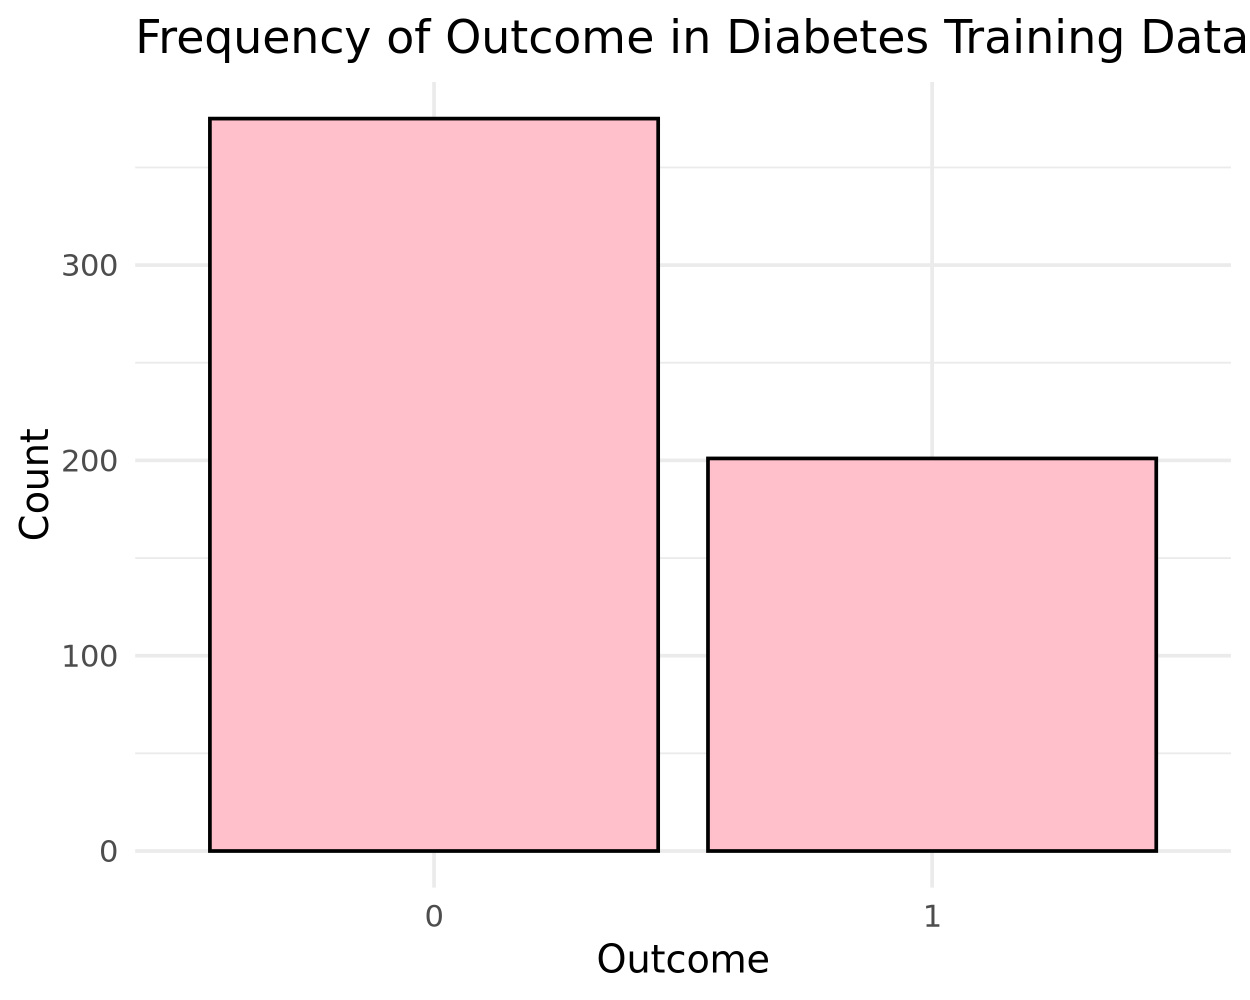

In [8]:
library(ggplot2)

##This will create a bar chart showing the Outcome frequencies for the diabetes_train data
ggplot(diabetes_train, aes(x = Outcome)) +
  geom_bar(fill = "pink", color = "black") +
  labs(title = "Frequency of Outcome in Diabetes Training Data",
       x = "Outcome",
       y = "Count") +
  theme_minimal()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:** 

No the data is not balanced, as the count of "1" is less than the count of the "0" outcome. 



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [9]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

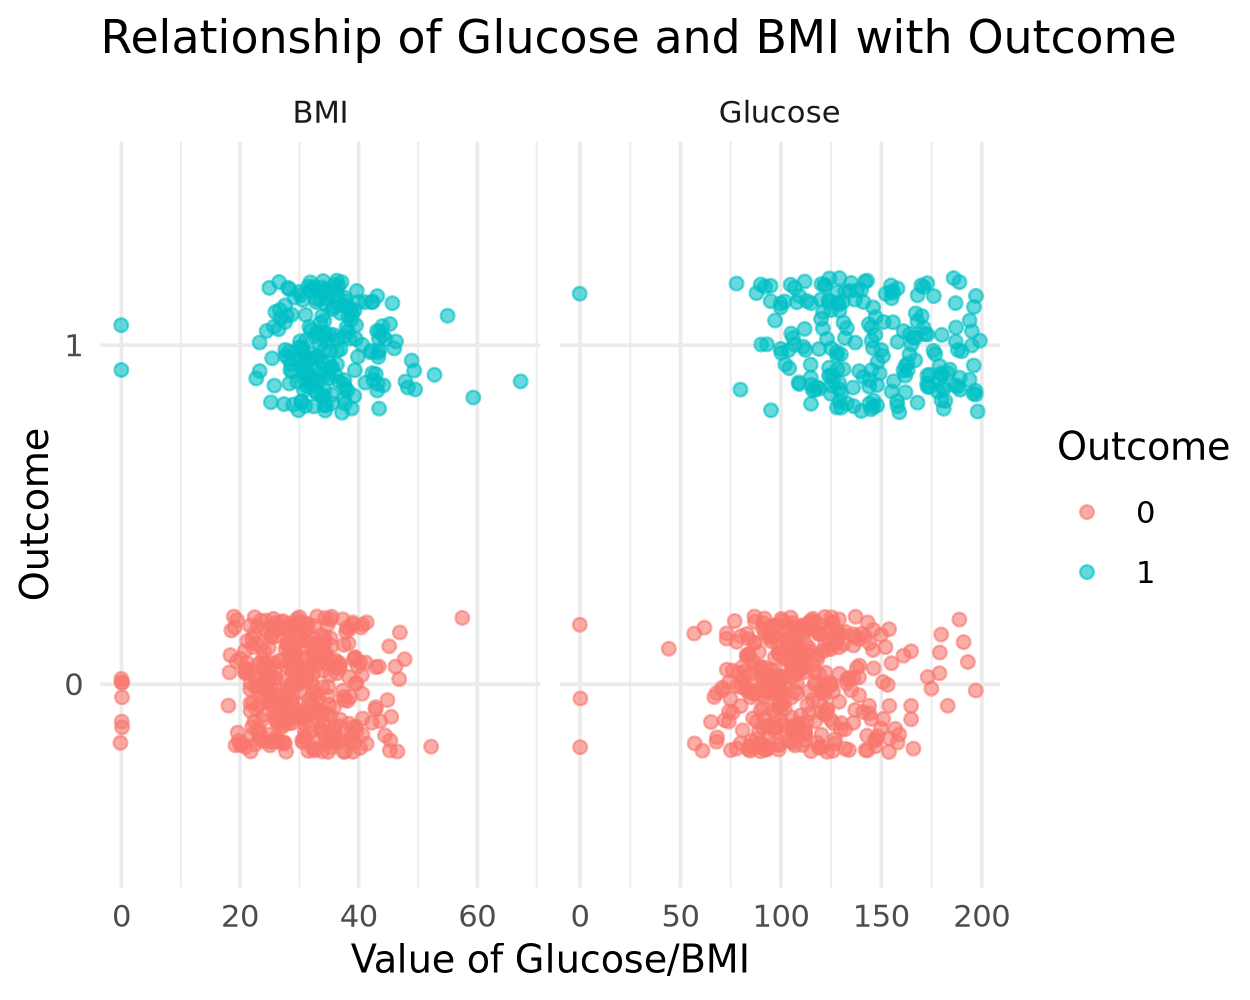

In [12]:
##This will create a scatter plot using geom_jitter to show the relationship of Glucose/BMI with Outcome
ggplot(plot_df, aes(x = value, y = Outcome, color = Outcome)) +
  geom_jitter(alpha = 0.6, width = 0.2, height = 0.2) +
  facet_wrap(~name, ncol = 2, scales = 'free_x') +
  labs(title = "Relationship of Glucose and BMI with Outcome",
       x = "Value of Glucose/BMI",
       y = "Outcome",
       color = "Outcome") +
  theme_minimal()

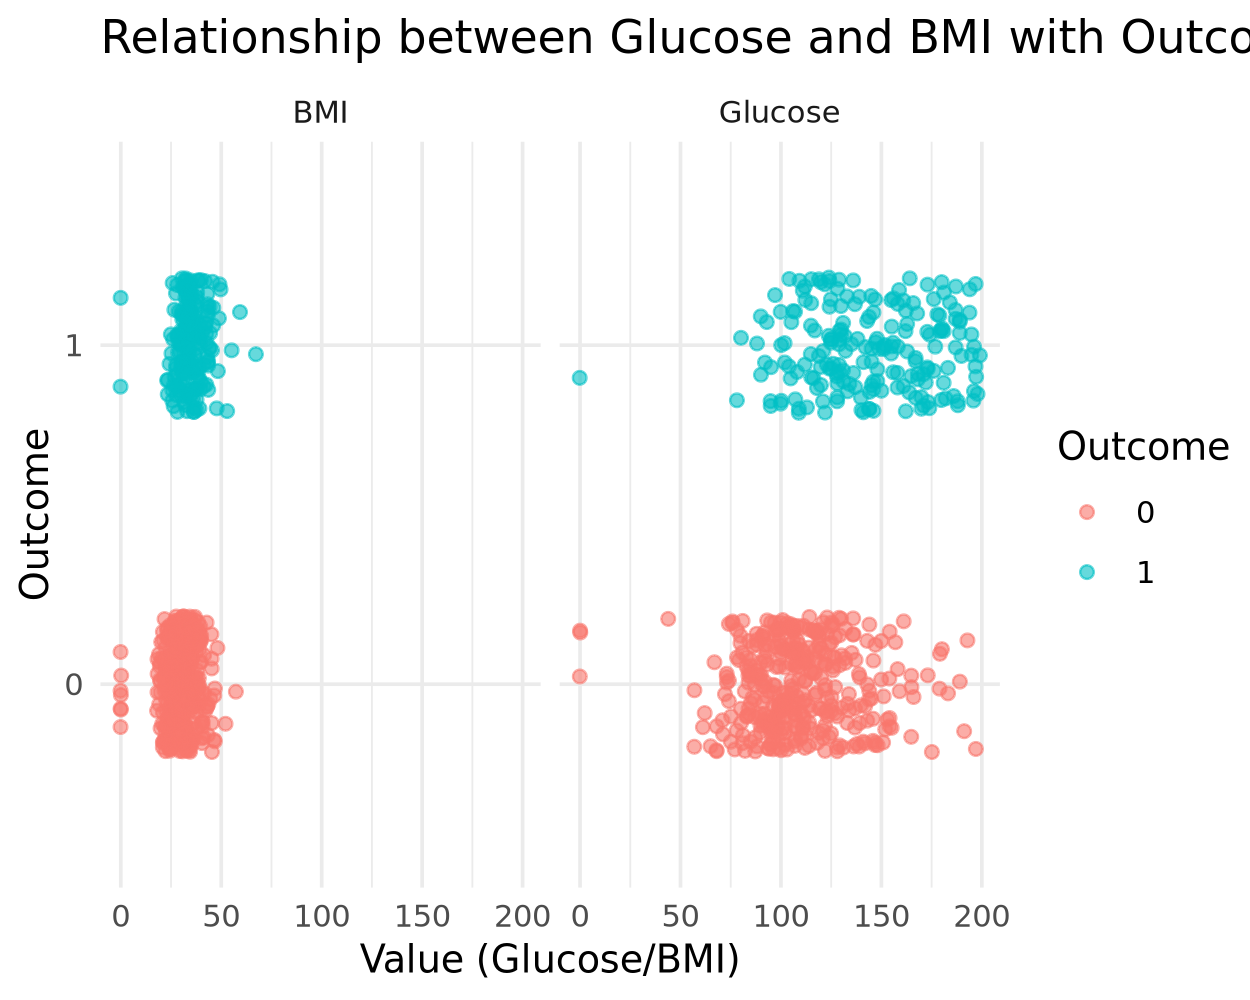

In [13]:
##This will create a scatter plot using geom_jitter to show the relationship of Glucose/BMI with Outcome
##Removal of scales = 'free_x' from the facet_wrap() function
ggplot(plot_df, aes(x = value, y = Outcome, color = Outcome)) +
  geom_jitter(alpha = 0.6, width = 0.2, height = 0.2) +
  facet_wrap(~name, ncol = 2) +
  labs(title = "Relationship between Glucose and BMI with Outcome",
       x = "Value (Glucose/BMI)",
       y = "Outcome",
       color = "Outcome") +
  theme_minimal()

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

When you remove the scales = 'free_x' argument from the facet_wrap function, it is evident that both Glucose and BMI will share the same x-axis scale rather than having independent x-axis scales. 

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [36]:
##This will define the logistic regression model
log_model <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")

diabetes_formula <- Outcome ~ BMI + Glucose

mod_fit <- log_model %>% fit(diabetes_formula, data = diabetes_train)

mod_fit

parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.67587      0.07225      0.03741  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 561.2 	AIC: 567.2

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [37]:
diabetes_test_wPred <- augment(mod_fit, new_data = diabetes_test)

head(diabetes_test_wPred)

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.2987293,0.7012707,8,183,64,0,0,23.3,0.672,32,1
0,0.8156075,0.1843925,5,116,74,0,0,25.6,0.201,30,0
0,0.8226712,0.1773288,7,107,74,0,0,29.6,0.254,31,1
0,0.6669399,0.3330601,1,103,30,38,83,43.3,0.183,33,0
0,0.7055847,0.2944153,1,115,70,30,96,34.6,0.529,32,1
0,0.5307034,0.4692966,3,126,88,41,235,39.3,0.704,27,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [38]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 113  37
         1  12  30

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

1. How many individuals had diabetes in your test data?
Based on the confusion matrix, the amount of individuals that had diabetes are 37 + 30= 67 individuals.

2. Of those that actually had diabetes, how many were predicted to have diabetes by your model?
30 indviduals were predicted to have diabetes that actually have diabetes by the confusion matrix.

3. How many individuals predicted to have diabetes did not have diabetes?
12 individuals were predicted to have diabetes and did not have diabetes. 